# Price Paid Model

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import fastai.fastai as fastai
from fastai.fastai.structured import *
from fastai.fastai.column_data import *

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',  500)
pd.set_option('display.width', 1000)

In [4]:
data = pd.read_csv('data/dataClean.csv')

In [5]:
display(data.head())

,price,propertyType,oldNew,duration,PAON,District,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,ROOF_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,HEAT_LOSS_CORRIDOOR,MECHANICAL_VENTILATION,postcodeDistrict,postcodeSector,yearOfTransfer,monthOfTransfer,inspectionYear,lodgementYear
0,114500,S,N,F,35,BARNET,C,C,80.0,80.0,Semi-Detached,E09000003,E14000741,rental (private),78.0,78.0,177.0,175.0,1.7,29.0,1.7,38.0,31.0,285.0,287.0,81.0,81.0,58.24,Single,Y,Ground,"Programmer, room thermostat and TRVs",100.0,double glazing installed during or after 2002,0.0,3.0,3.0,75.0,0.0,From main system,Very Good,Very Good,"Suspended, insulated (assumed)",Fully double glazed,Good,Good,"Solid brick, with internal insulation",Good,Good,None,(another dwelling above),"Boiler and radiators, mains gas",Very Good,Very Good,"Programmer, room thermostat and TRVs",Good,Good,Low energy lighting in 75% of fixed outlets,Very Good,Very Good,mains gas - this is for backwards compatibilit...,no corridor,natural,NW7,NW7 3,1996,3,2010,2010
1,97000,T,N,F,6,ENFIELD,E,B,52.0,86.0,Mid-Terrace,E09000010,E14000687,ECO assessment,44.0,84.0,338.0,76.0,5.0,60.0,1.1,73.0,53.0,893.0,418.0,133.0,70.0,83.00,Single,Y,NaN,"Programmer, no room thermostat",100.0,double glazing installed before 2002,1.0,3.0,3.0,63.0,0.0,From main system,Good,Good,"Suspended, no insulation (assumed)",Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,"Pitched, 50 mm loft insulation","Boiler and radiators, mains gas",Good,Good,"Programmer, no room thermostat",Very Poor,Very Poor,Low energy lighting in 63% of fixed outlets,Good,Good,mains gas (not community),NaN,natural,N9,N9 9,2001,2,2015,2015
2,74000,T,N,F,53,CROYDON,D,D,57.0,64.0,Semi-Detached,E09000008,E14000655,marketed sale,50.0,58.0,343.0,283.0,5.1,57.0,4.3,60.0,46.0,781.0,667.0,122.0,101.0,89.68,Single,Y,NaN,"Programmer, TRVs and bypass",100.0,double glazing installed during or after 2002,0.0,5.0,5.0,70.0,0.0,From main system,Good,Good,"Suspended, no insulation (assumed)",Fully double glazed,Good,Good,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,"Pitched, 150mm loft insulation","Boiler and radiators, mains gas",Good,Good,"Programmer, TRVs and bypass",Average,Average,Low energy lighting in 70% of fixed outlets,Very Good,Very Good,mains gas - this is for backwards compatibilit...,NaN,natural,SW16,SW16 4,1995,4,2010,2010
3,272500,F,N,L,187,KENSINGTON AND CHELSEA,C,C,72.0,76.0,Detached,E09000020,E14000768,marketed sale,69.0,73.0,243.0,212.0,2.4,40.3,2.1,57.0,29.0,352.0,324.0,74.0,74.0,60.00,Single,Y,1st,"Programmer, no room thermostat",0.0,INVALID!,0.0,3.0,3.0,0.0,0.0,From main system,Very Good,Very Good,(other premises below),Single glazed,Very Poor,Very Poor,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,(another dwelling above),"Boiler and radiators, mains gas",Very Good,Very Good,"Programmer, no room thermostat",Very Poor,Very Poor,No l

## Basic Feature Engineering

In [6]:
catVariables = ['propertyType', 'oldNew', 'duration', 'PAON', 'District',
              'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING', 'BUILT_FORM',
              'LOCAL_AUTHORITY', 'CONSTITUENCY', 'TRANSACTION_TYPE', 'ENERGY_TARIFF',
               'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION',
               'GLAZED_TYPE', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
               'LOW_ENERGY_LIGHTING', 'NUMBER_OPEN_FIREPLACES', 'HOTWATER_DESCRIPTION',
               'HOT_WATER_ENERGY_EFF', 'HOT_WATER_ENV_EFF', 'FLOOR_DESCRIPTION',
               'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF',
               'WALLS_DESCRIPTION', 'WALLS_ENERGY_EFF', 'WALLS_ENV_EFF', 'SECONDHEAT_DESCRIPTION',
               'ROOF_DESCRIPTION', 'MAINHEAT_DESCRIPTION', 'MAINHEAT_ENERGY_EFF', 
               'MAINHEAT_ENV_EFF', 'MAINHEATCONT_DESCRIPTION', 'MAINHEATC_ENERGY_EFF',
               'MAINHEATC_ENV_EFF', 'LIGHTING_DESCRIPTION', 'LIGHTING_ENERGY_EFF',
               'LIGHTING_ENV_EFF', 'MAIN_FUEL', 'HEAT_LOSS_CORRIDOOR', 'MECHANICAL_VENTILATION',
               'postcodeDistrict', 'postcodeSector', 'yearOfTransfer', 'monthOfTransfer',
               'inspectionYear', 'lodgementYear'
              ]
continVariables = ['CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY',
                  'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL',
                  'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL',
                  'CO2_EMISSIONS_CURRENT', 'CO2_EMISS_CURR_PER_FLOOR_AREA',
                  'CO2_EMISSIONS_POTENTIAL', 'LIGHTING_COST_CURRENT', 
                  'LIGHTING_COST_POTENTIAL', 'HEATING_COST_CURRENT',
                  'HEATING_COST_POTENTIAL', 'HOT_WATER_COST_CURRENT',
                  'HOT_WATER_COST_POTENTIAL', 'TOTAL_FLOOR_AREA', 
                  ]

In [7]:
for key in catVariables:
    data[key] = data[key].astype('category').cat.as_ordered()

In [16]:
for key in continVariables:
    data[key] = data[key].astype('float32')

In [17]:
data[:2]

,price,propertyType,oldNew,duration,PAON,District,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,ROOF_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,HEAT_LOSS_CORRIDOOR,MECHANICAL_VENTILATION,postcodeDistrict,postcodeSector,yearOfTransfer,monthOfTransfer,inspectionYear,lodgementYear
0,114500,S,N,F,35,BARNET,C,C,80.0,80.0,Semi-Detached,E09000003,E14000741,rental (private),78.0,78.0,177.0,175.0,1.7,29.0,1.7,38.0,31.0,285.0,287.0,81.0,81.0,58.240002,Single,Y,Ground,"Programmer, room thermostat and TRVs",100.0,double glazing installed during or after 2002,0.0,3.0,3.0,75.0,0.0,From main system,Very Good,Very Good,"Suspended, insulated (assumed)",Fully double glazed,Good,Good,"Solid brick, with internal insulation",Good,Good,None,(another dwelling above),"Boiler and radiators, mains gas",Very Good,Very Good,"Programmer, room thermostat and TRVs",Good,Good,Low energy lighting in 75% of fixed outlets,Very Good,Very Good,mains gas - this is for backwards compatibilit...,no corridor,natural,NW7,NW7 3,1996,3,2010,2010
1,97000,T,N,F,6,ENFIELD,E,B,52.0,86.0,Mid-Terrace,E09000010,E14000687,ECO assessment,44.0,84.0,338.0,76.0,5.0,60.0,1.1,73.0,53.0,893.0,418.0,133.0,70.0,83.000000,Single,Y,NaN,"Programmer, no room thermostat",100.0,double glazing installed before 2002,1.0,3.0,3.0,63.0,0.0,From main system,Good,Good,"Suspended, no insulation (assumed)",Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,"Pitched, 50 mm loft insulation","Boiler and radiators, mains gas",Good,Good,"Programmer, no room thermostat",Very Poor,Very Poor,Low energy lighting in 63% of fixed outlets,Good,Good,mains gas (not community),NaN,natural,N9,N9 9,2001,2,2015,2015


In [23]:
df, y, nas, mapper = proc_df(data, 'price', do_scale=True)
yl = np.log(y)

In [24]:
df.head(2)

,propertyType,oldNew,duration,PAON,District,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,ROOF_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,HEAT_LOSS_CORRIDOOR,MECHANICAL_VENTILATION,postcodeDistrict,postcodeSector,yearOfTransfer,monthOfTransfer,inspectionYear,lodgementYear
0,4,1,1,530,2,3,3,1.658621,0.624052,7,6,34,12,1.724347,0.650789,-0.184977,-0.116364,-0.138573,-0.402269,-0.179895,-0.852799,-0.772925,-0.888957,-0.708342,-0.758864,-0.453100,-0.534707,1,2,23,48,101,3,1,4,4,76,1,20,4,4,24,5,2,2,54,2,2,87,1,20,4,4,48,2,2,88,4,4,25,2,3,61,250,2,3,8,8
1,5,1,1,867,11,5,2,-0.590686,1.099184,5,13,21,1,-0.894928,1.092581,-0.158897,-0.146396,-0.135497,0.440692,-0.180402,-0.205843,0.003468,0.214703,-0.396580,0.029220,-0.709097,-0.202763,1,2,0,46,101,2,2,4,4,64,1,20,2,2,26,5,1,1,38,5,5,87,97,20,2,2,46,5,5,75,2,2,24,0,3,52,193,7,2,13,13


In [25]:
train_ratio = 0.85
train_size = int(len(df) * train_ratio);
val_idx = list(range(train_size, len(df)))

## Model

In [27]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y * 1.2) 

In [50]:
PATH = 'data/'
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=catVariables, bs=128,
                                       )

In [35]:
cat_sz = [(c, len(data[c].cat.categories)+1) for c in catVariables]
cat_sz[:10]

[('propertyType', 6),
 ('oldNew', 3),
 ('duration', 4),
 ('PAON', 1733),
 ('District', 36),
 ('CURRENT_ENERGY_RATING', 9),
 ('POTENTIAL_ENERGY_RATING', 8),
 ('BUILT_FORM', 8),
 ('LOCAL_AUTHORITY', 34),
 ('CONSTITUENCY', 61)]

In [36]:
# Embedding
emb_szs = [(c, min(50, (c+1)//2)) for _, c in cat_sz]
emb_szs[:10]

[(6, 3),
 (3, 2),
 (4, 2),
 (1733, 50),
 (36, 18),
 (9, 5),
 (8, 4),
 (8, 4),
 (34, 17),
 (61, 31)]

In [55]:
m = md.get_learner(emb_szs, len(df.columns) - len(catVariables),
                  0.04, 1, [1000, 1000, 500], [0.001, 0.001, 0.01], y_range=y_range)
lr = 1e-5

In [ ]:
m.lr_find()

In [58]:
m = md.get_learner(emb_szs, len(df.columns) - len(catVariables),
                  0.04, 1, [1000, 100, 500], [0.001, 0.001, 0.01], y_range=y_range)
lr = 1e-3

In [59]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.08892    0.09065    2.229567  
    1      0.077451   0.085653   2.243503                       
    2      0.069878   0.082299   2.392086                       



[0.082298994, 2.3920860213087805]

In [60]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.061935   0.076054   2.289388  
    1      0.067074   0.074398   2.509434                       
    2      0.055749   0.074139   2.303915                       
    3      0.056462   0.074501   2.845735                       
    4      0.058245   0.075105   3.490683                       



[0.075105436, 3.490682998379867]

In [61]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.069427   0.078309   2.721211  
    1      0.055481   0.075974   2.469912                       
    2      0.048178   0.074187   3.383486                       
    3      0.049567   0.074451   3.513977                       
    4      0.060988   0.079558   2.410327                       
    5      0.04584    0.075565   2.304146                       
    6      0.039122   0.0743     2.705064                       
    7      0.036876   0.074336   2.880704                       



[0.074336186, 2.88070409718998]

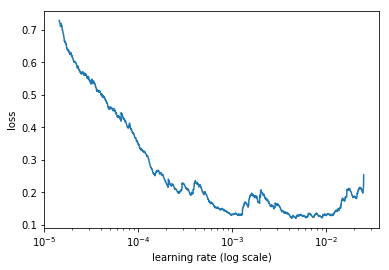

In [57]:
m.sched.plot(100)